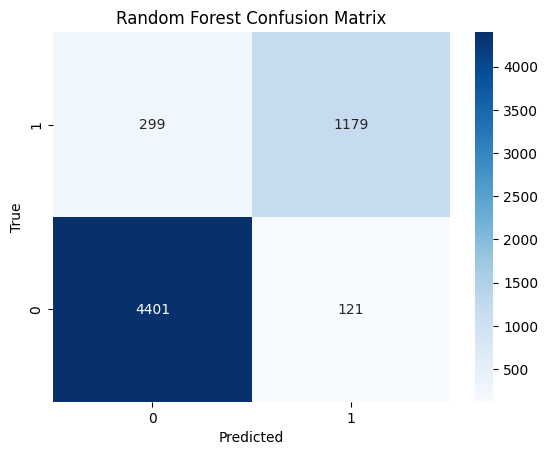

Random Forest Accuracy: 0.93


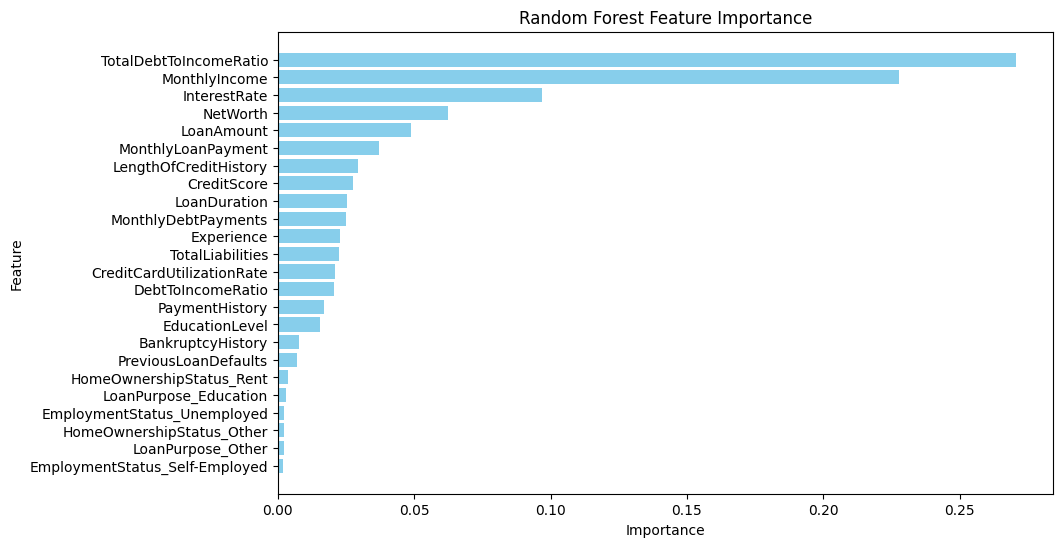

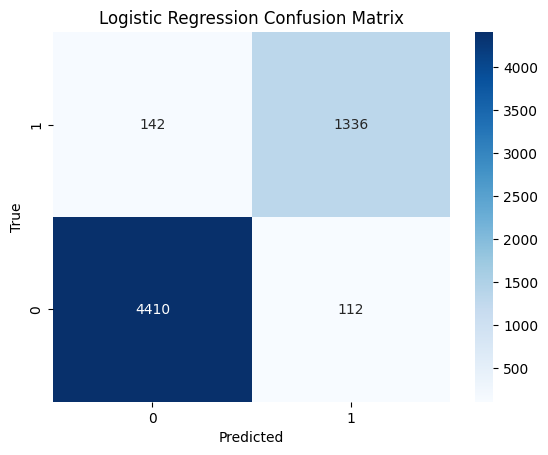

Logistic Regression Accuracy: 0.96


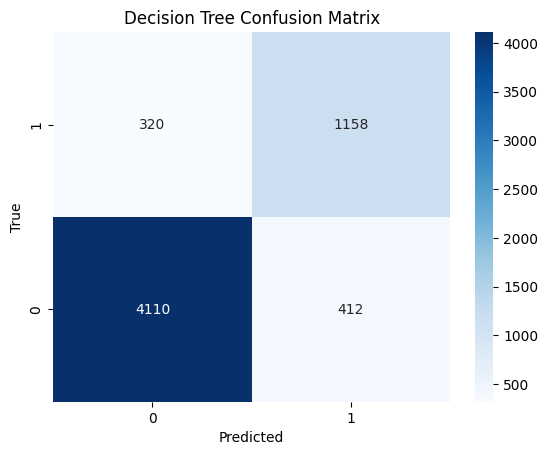

Decision Tree Accuracy: 0.88


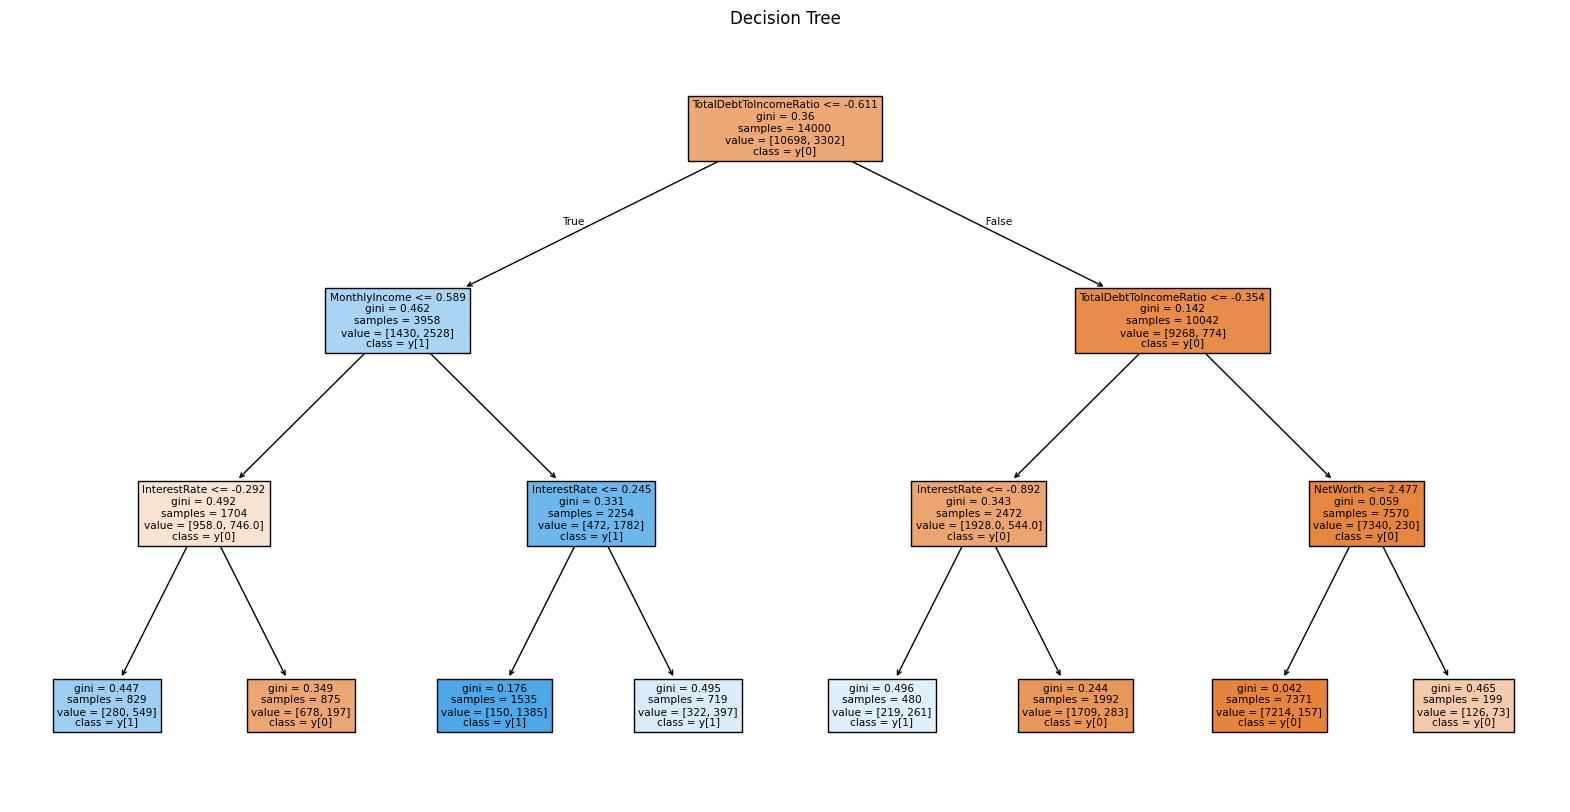

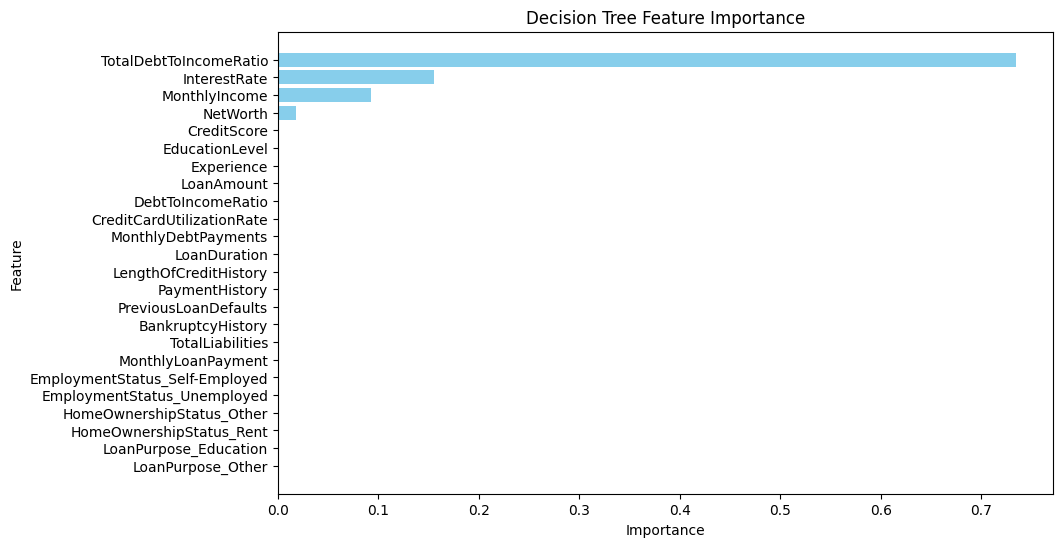

In [ ]:
#%%

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Main Function
def main():
    df = load_data("Loan.csv")
    df = clean_data(df)
    df_corr, x, y = preprocess_data(df)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)
    
    # Train and evaluate models
    train_random_forest(x_train, y_train, x_test, y_test)
    train_logistic_regression(x_train, y_train, x_test, y_test)
    train_decision_tree(x_train, y_train, x_test, y_test, df_corr.columns.tolist())

# Function for Loading Data
def load_data(file_path):
    return pd.read_csv(file_path)

# Function for Cleaning Data
def clean_data(df):
    columns_to_drop = [
        'ApplicationDate', 'Age', 'AnnualIncome', 'TotalAssets', 'BaseInterestRate',
        'SavingsAccountBalance', 'CheckingAccountBalance', 'NumberOfDependents',
        'UtilityBillsPaymentHistory', 'NumberOfCreditInquiries', 'NumberOfOpenCreditLines', 'JobTenure'
    ]
    df = df.drop(columns=columns_to_drop)
    return df

# Function for Preprocessing Data
def preprocess_data(df):
    df['EducationLevel'] = df['EducationLevel'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'Doctorate': 3, 'Associate': 4})
    nominal_columns = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
    df_corr = pd.get_dummies(df, columns=nominal_columns, drop_first=True)
    df_corr = df_corr.drop(['MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'LoanPurpose_Home', 'LoanPurpose_Debt Consolidation', 'HomeOwnershipStatus_Own'], axis=1)
    
    # Separate features and target
    x = df_corr.drop(['RiskScore', 'LoanApproved'], axis=1)
    y = df_corr[['LoanApproved']]
    
    # Standardization
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    return df_corr, x, y

# Function to Train and Evaluate Random Forest
def train_random_forest(x_train, y_train, x_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    evaluate_model(y_test, y_pred, "Random Forest")
    
    # Feature Importance Plot
    feature_importance_plot(model, model.feature_names_in_, "Random Forest Feature Importance")

# Function to Train and Evaluate Logistic Regression
def train_logistic_regression(x_train, y_train, x_test, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    evaluate_model(y_test, y_pred, "Logistic Regression")

# Function to Train and Evaluate Decision Tree
def train_decision_tree(x_train, y_train, x_test, y_test, feature_names):
    model = DecisionTreeClassifier(max_depth=3, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    evaluate_model(y_test, y_pred, "Decision Tree")
    
    # Decision Tree Plot
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=True)
    plt.title("Decision Tree")
    plt.show()

    # Feature Importance Plot
    feature_importance_plot(model, model.feature_names_in_, "Decision Tree Feature Importance")

# Function for Model Evaluation (Confusion Matrix and Accuracy)
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.gca().invert_yaxis()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Function to Plot Feature Importance
def feature_importance_plot(model, feature_names, title):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()